In [176]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

In [177]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
from pandas.plotting import parallel_coordinates
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz,  plot_tree
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [341]:
employee = pd.read_csv('employee_cleaned.csv')
employee.head()

,Education,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,Duration
0,Bachelors,Bangalore,3,34,Male,No,0,0,3
1,Bachelors,Pune,1,28,Female,No,3,1,7
2,Bachelors,New Delhi,3,38,Female,No,2,0,6
3,Masters,Bangalore,3,27,Male,No,5,1,4
4,Masters,Pune,3,24,Male,Yes,2,1,3


### Replace Education categorical to numerical values

In [342]:
#employee['Education'].replace({'PHD': 'a', 'Masters': 'b', 'Bachelors': 'c'}, inplace=True)
employee['Education'].replace(to_replace = ['PHD', 'Masters', 'Bachelors'], value = ['3', '2', '1'], inplace = True)
employee['Education'] = employee['Education'].astype('int64')
employee.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2764 entries, 0 to 2763
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2764 non-null   int64 
 1   City                       2764 non-null   object
 2   PaymentTier                2764 non-null   int64 
 3   Age                        2764 non-null   int64 
 4   Gender                     2764 non-null   object
 5   EverBenched                2764 non-null   object
 6   ExperienceInCurrentDomain  2764 non-null   int64 
 7   LeaveOrNot                 2764 non-null   int64 
 8   Duration                   2764 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 194.5+ KB


## Split the data into training and test sets

In [489]:
employee_train, employee_test = train_test_split(employee, test_size = 0.40, random_state = 7)
print(employee.shape)
print(employee_train.shape)
print(employee_test.shape)

(2764, 9)
(1658, 9)
(1106, 9)


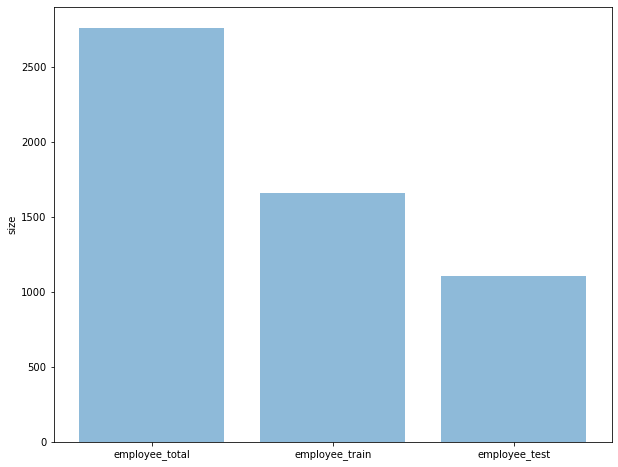

In [490]:
portion = ('employee_total', 'employee_train', 'employee_test')
y_pos = np.arange(len(portion))
size = [2764,1658,1106]

plt.bar(y_pos, size, align='center', alpha=0.5)
plt.xticks(y_pos, portion)
plt.ylabel('size')

plt.show()

### Separate data frames for interested predictor variables and response variable

### *Data with all predictor variables

In [491]:
#---Training set---

x_all = employee_train.drop(['LeaveOrNot'], axis= 1)
x_all = pd.get_dummies(x_all)
y_all = employee_train[['LeaveOrNot']]
y_names_all = ["No", "Yes"]

#---Test set---

x_test_all = employee_test.drop(['LeaveOrNot'], axis= 1)
x_test_all = pd.get_dummies(x_test_all)
y_test_all = employee_test[['LeaveOrNot']]

x_all.head(2)


,Education,PaymentTier,Age,ExperienceInCurrentDomain,Duration,City_Bangalore,City_New Delhi,City_Pune,Gender_Female,Gender_Male,EverBenched_No,EverBenched_Yes
2040,1,3,33,5,3,0,0,1,0,1,0,1
1872,1,3,40,0,4,1,0,0,0,1,1,0


In [492]:
#Run C5.0 using entropy criterion
C5_all = DecisionTreeClassifier(criterion = "gini", \
                                max_leaf_nodes = 15, \
                                min_samples_leaf= 75).fit(x_all,y_all)
export_graphviz (C5_all, out_file = 'C5_all.dot')

#predict income in training data set
y_train_pred_all = C5_all.predict(x_all)
y_train_pred_all

array([0, 0, 0, ..., 0, 0, 0])

[Text(235.82142857142858, 403.81714285714287, 'Duration <= 2.5\ngini = 0.472\nsamples = 1658\nvalue = [1026, 632]\nclass = No'),
 Text(209.25, 341.69142857142856, 'gini = 0.043\nsamples = 137\nvalue = [3, 134]\nclass = Yes'),
 Text(262.39285714285717, 341.69142857142856, 'PaymentTier <= 2.5\ngini = 0.44\nsamples = 1521\nvalue = [1023, 498]\nclass = No'),
 Text(106.28571428571429, 279.5657142857143, 'Gender_Female <= 0.5\ngini = 0.498\nsamples = 467\nvalue = [220, 247]\nclass = Yes'),
 Text(53.142857142857146, 217.44, 'Age <= 28.5\ngini = 0.436\nsamples = 181\nvalue = [123, 58]\nclass = No'),
 Text(26.571428571428573, 155.3142857142857, 'gini = 0.488\nsamples = 90\nvalue = [52, 38]\nclass = No'),
 Text(79.71428571428572, 155.3142857142857, 'gini = 0.343\nsamples = 91\nvalue = [71, 20]\nclass = No'),
 Text(159.42857142857144, 217.44, 'Education <= 1.5\ngini = 0.448\nsamples = 286\nvalue = [97, 189]\nclass = Yes'),
 Text(132.85714285714286, 155.3142857142857, 'City_Pune <= 0.5\ngini = 0.3

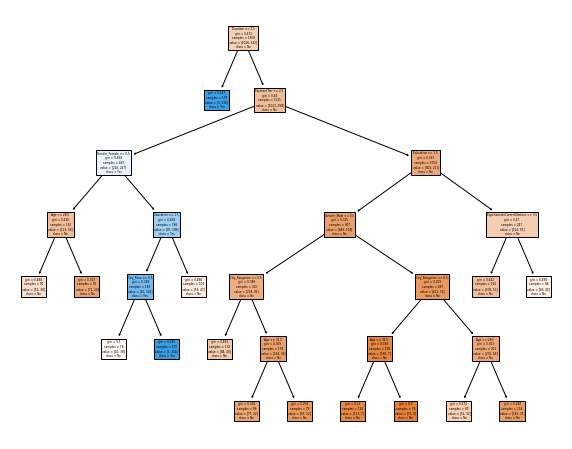

In [493]:
#Visualize the tree
plt.rcParams['figure.figsize'] = (10, 8)
plot_tree(C5_all, feature_names=x_all.columns.values, filled=True,
         class_names=y_names_all)

In [495]:
#make prediction
y_pred_all = C5_all.predict(x_test_all)

y_actual_all = pd.Series(employee_test['LeaveOrNot'], name='Actual')
y_predicted_all = pd.Series(y_pred_all, name='Predicted')

#create confusion matrix
tab_all = pd.crosstab(y_actual_all, y_predicted_all)
tab_all['Total'] = tab_all.sum(axis =1)
tab_all.loc['Total'] = tab_all.sum()
#
tab_all

Predicted,0,1,Total
Actual,,,
0,206,35,241
1,167,34,201
Total,373,69,442


In [474]:
print("Accuracy:",metrics.accuracy_score(y_test_all, y_pred_all))
print("Precision:",metrics.precision_score(y_test_all, y_pred_all))
print("Recall:",metrics.recall_score(y_test_all, y_pred_all))

Accuracy: 0.6967509025270758
Precision: 0.8
Recall: 0.4


#### Examine feature importance for C5_all model

In [382]:
from sklearn.inspection import permutation_importance
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt

In [383]:
#Feature importance
feature_scores_all = pd.Series(C5_all.feature_importances_, index= x_all.columns).sort_values(ascending=False)

feature_scores_all

Duration                     0.427317
PaymentTier                  0.204439
Gender_Female                0.088903
City_Bangalore               0.088522
Age                          0.054115
Education                    0.053935
City_Pune                    0.050317
Gender_Male                  0.025043
ExperienceInCurrentDomain    0.007408
City_New Delhi               0.000000
EverBenched_No               0.000000
EverBenched_Yes              0.000000
dtype: float64

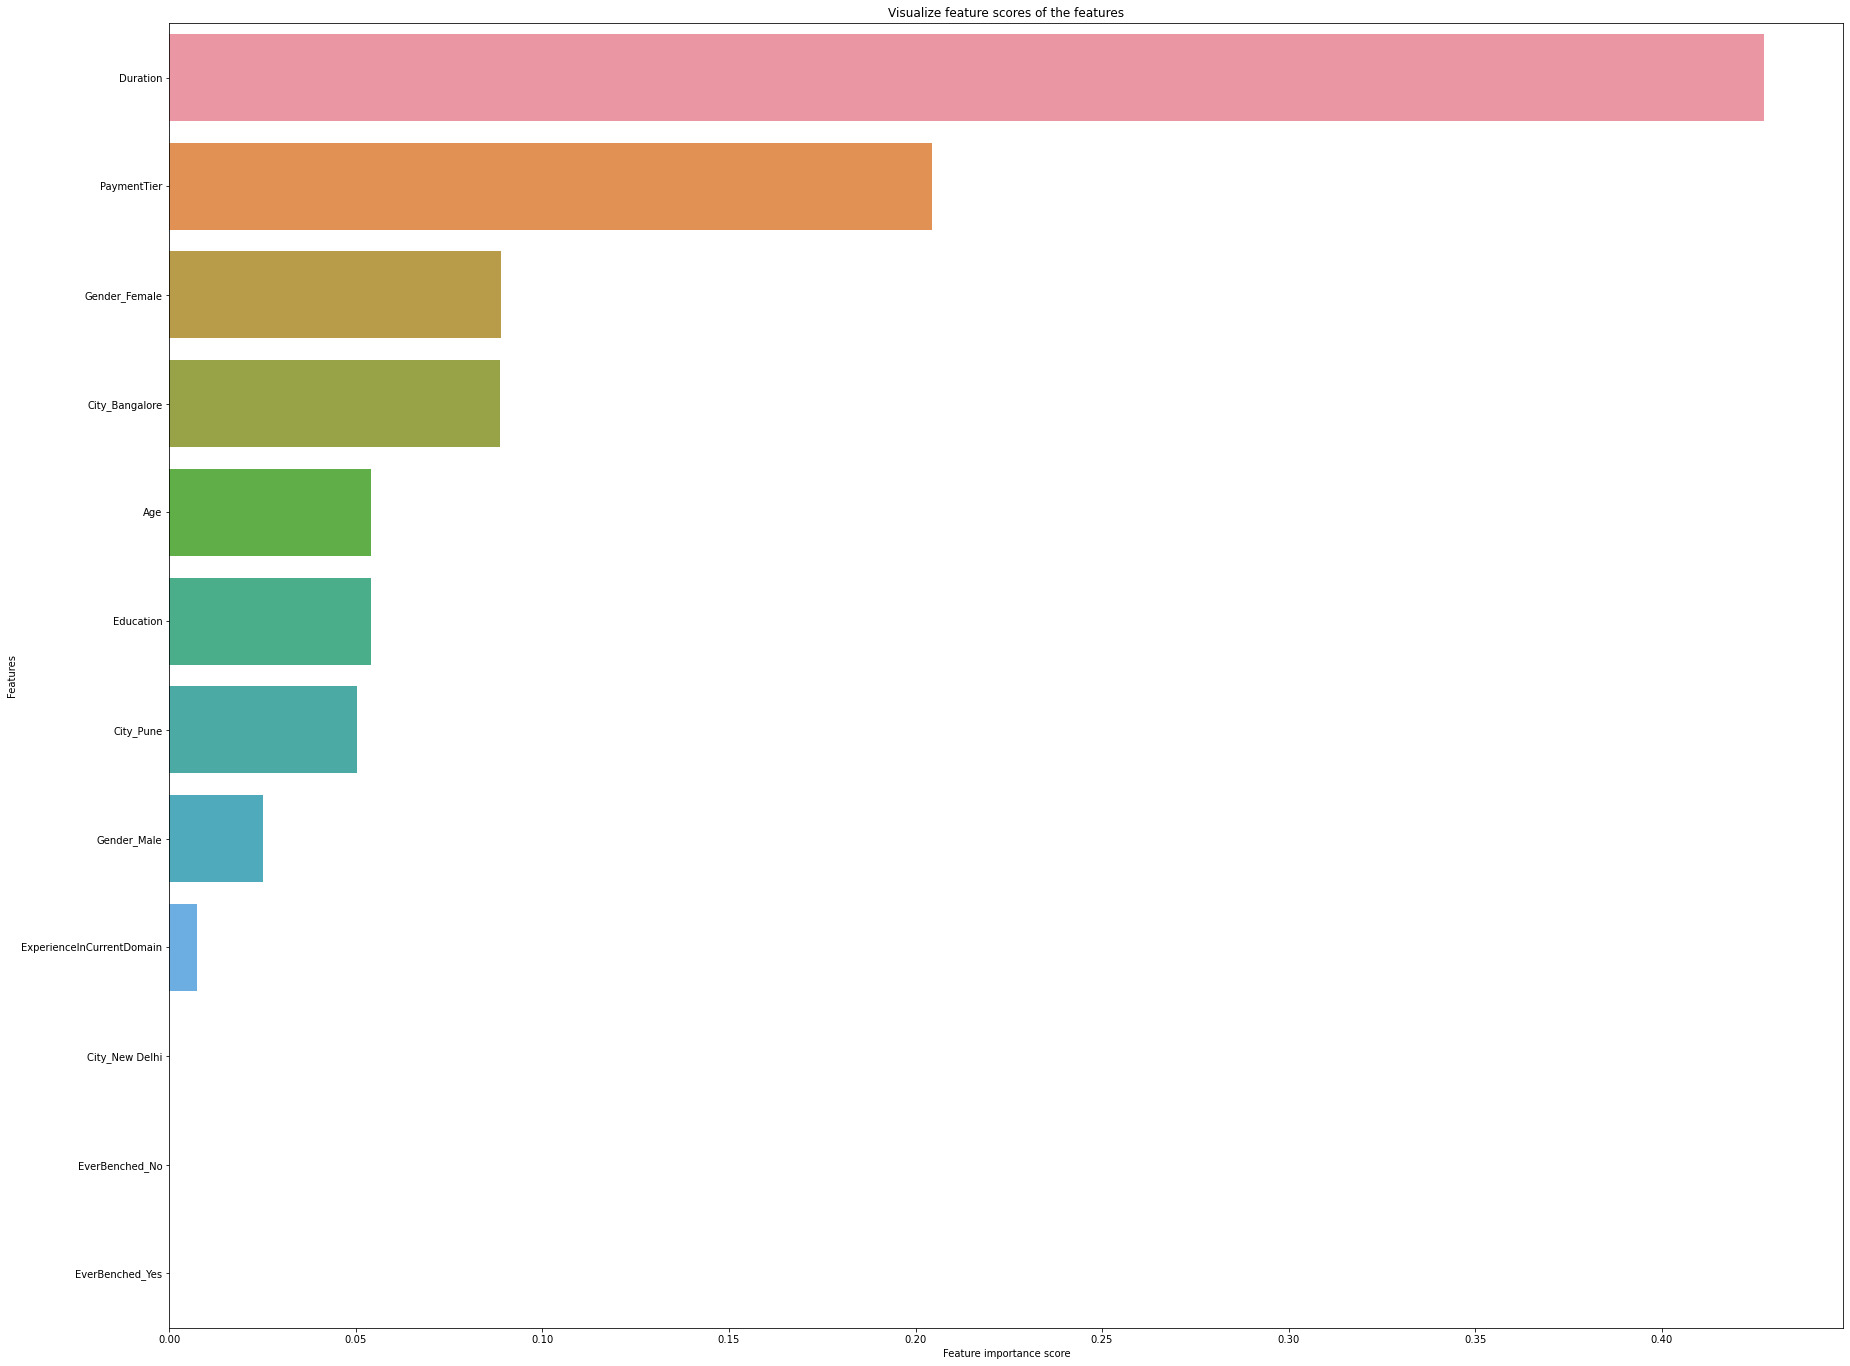

In [384]:
# Creating a seaborn bar plot
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores_all, y=feature_scores_all.index, data = x_all[[]])
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores_all.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

### -->
### --> It seems Duration, PaymentTier, Gender  and City are a good candidate for a simplified model

### *Data with Duration, PaymentTier, Gender and Education as predictor variables 

In [ ]:
'Duration', 'PaymentTier', 'Gender', 'City'

In [448]:
#---Training set---

x = employee_train[['Duration', 'PaymentTier', 'Gender', 'City']]
x = pd.get_dummies(x)
y = employee_train[['LeaveOrNot']]
x_names = ['Duration', 'PaymentTier', 'Gender', 'City']
x_names = x.columns.values
y_names = ["No", "Yes"]

#---Test set---

x_test = employee_test[['Duration', 'PaymentTier', 'Gender', 'City']]
x_test = pd.get_dummies(x_test)
y_test = employee_test[['LeaveOrNot']]
x_test_names = x_test.columns
y_test_names = ["No", "Yes"]

x.head(2)

,Duration,PaymentTier,Gender_Female,Gender_Male,City_Bangalore,City_New Delhi,City_Pune
2040,3,3,0,1,0,0,1
1872,4,3,0,1,1,0,0


In [441]:
#Run C5.0 using entropy criterion
C5 = DecisionTreeClassifier(criterion = "gini", \
                                max_leaf_nodes = 10, \
                                min_samples_leaf= 75).fit(x,y)
export_graphviz (C5, out_file = 'C5.dot')

#predict income in training data set
y_train_pred = C5.predict(x)
y_train_pred

array([0, 0, 1, ..., 0, 0, 0])

[Text(209.25, 398.64, 'Duration <= 2.5\ngini = 0.472\nsamples = 1658\nvalue = [1026, 632]\nclass = No'),
 Text(162.75, 326.15999999999997, 'gini = 0.043\nsamples = 137\nvalue = [3, 134]\nclass = Yes'),
 Text(255.75, 326.15999999999997, 'PaymentTier <= 2.5\ngini = 0.44\nsamples = 1521\nvalue = [1023, 498]\nclass = No'),
 Text(139.5, 253.67999999999998, 'Gender_Male <= 0.5\ngini = 0.498\nsamples = 467\nvalue = [220, 247]\nclass = Yes'),
 Text(93.0, 181.2, 'City_Pune <= 0.5\ngini = 0.448\nsamples = 286\nvalue = [97, 189]\nclass = Yes'),
 Text(46.5, 108.71999999999997, 'gini = 0.5\nsamples = 146\nvalue = [71, 75]\nclass = Yes'),
 Text(139.5, 108.71999999999997, 'gini = 0.302\nsamples = 140\nvalue = [26, 114]\nclass = Yes'),
 Text(186.0, 181.2, 'gini = 0.436\nsamples = 181\nvalue = [123, 58]\nclass = No'),
 Text(372.0, 253.67999999999998, 'Gender_Female <= 0.5\ngini = 0.363\nsamples = 1054\nvalue = [803, 251]\nclass = No'),
 Text(279.0, 181.2, 'City_Pune <= 0.5\ngini = 0.321\nsamples = 652\

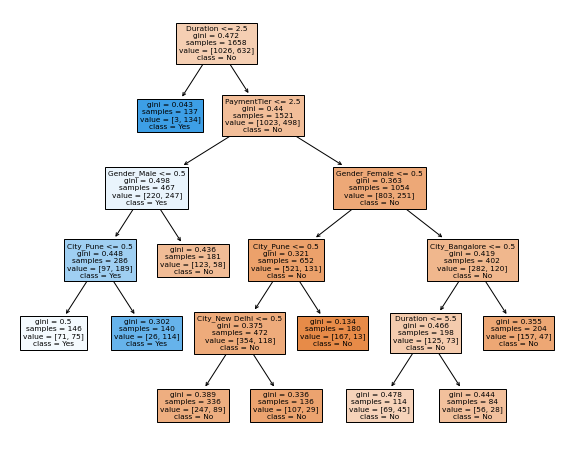

In [442]:
#Visualize the tree
plt.rcParams['figure.figsize'] = (10, 8)
plot_tree(C5, feature_names=x.columns.values, filled=True,
         class_names=y_names)

In [449]:
#make prediction
y_pred = C5.predict(x_test)

y_actual = pd.Series(employee_test['LeaveOrNot'], name='Actual')
y_predicted = pd.Series(y_pred, name='Predicted')

#create confusion matrix
tab1 = pd.crosstab(y_actual, y_predicted)
tab1['Total'] = tab1.sum(axis =1)
tab1.loc['Total'] = tab1.sum()
tab1

Predicted,0,1,Total
Actual,,,
0,184,57,241
1,150,51,201
Total,334,108,442


In [444]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7115732368896925
Precision: 0.7455197132616488
Recall: 0.45614035087719296


#### Examine feature importance for C5 model

In [400]:
#Feature importance
feature_scores = pd.Series(C5.feature_importances_, index= x.columns).sort_values(ascending=False)

feature_scores

Duration          0.496343
PaymentTier       0.237101
Gender_Male       0.128352
City_Pune         0.117294
City_Bangalore    0.020911
Gender_Female     0.000000
City_New Delhi    0.000000
dtype: float64

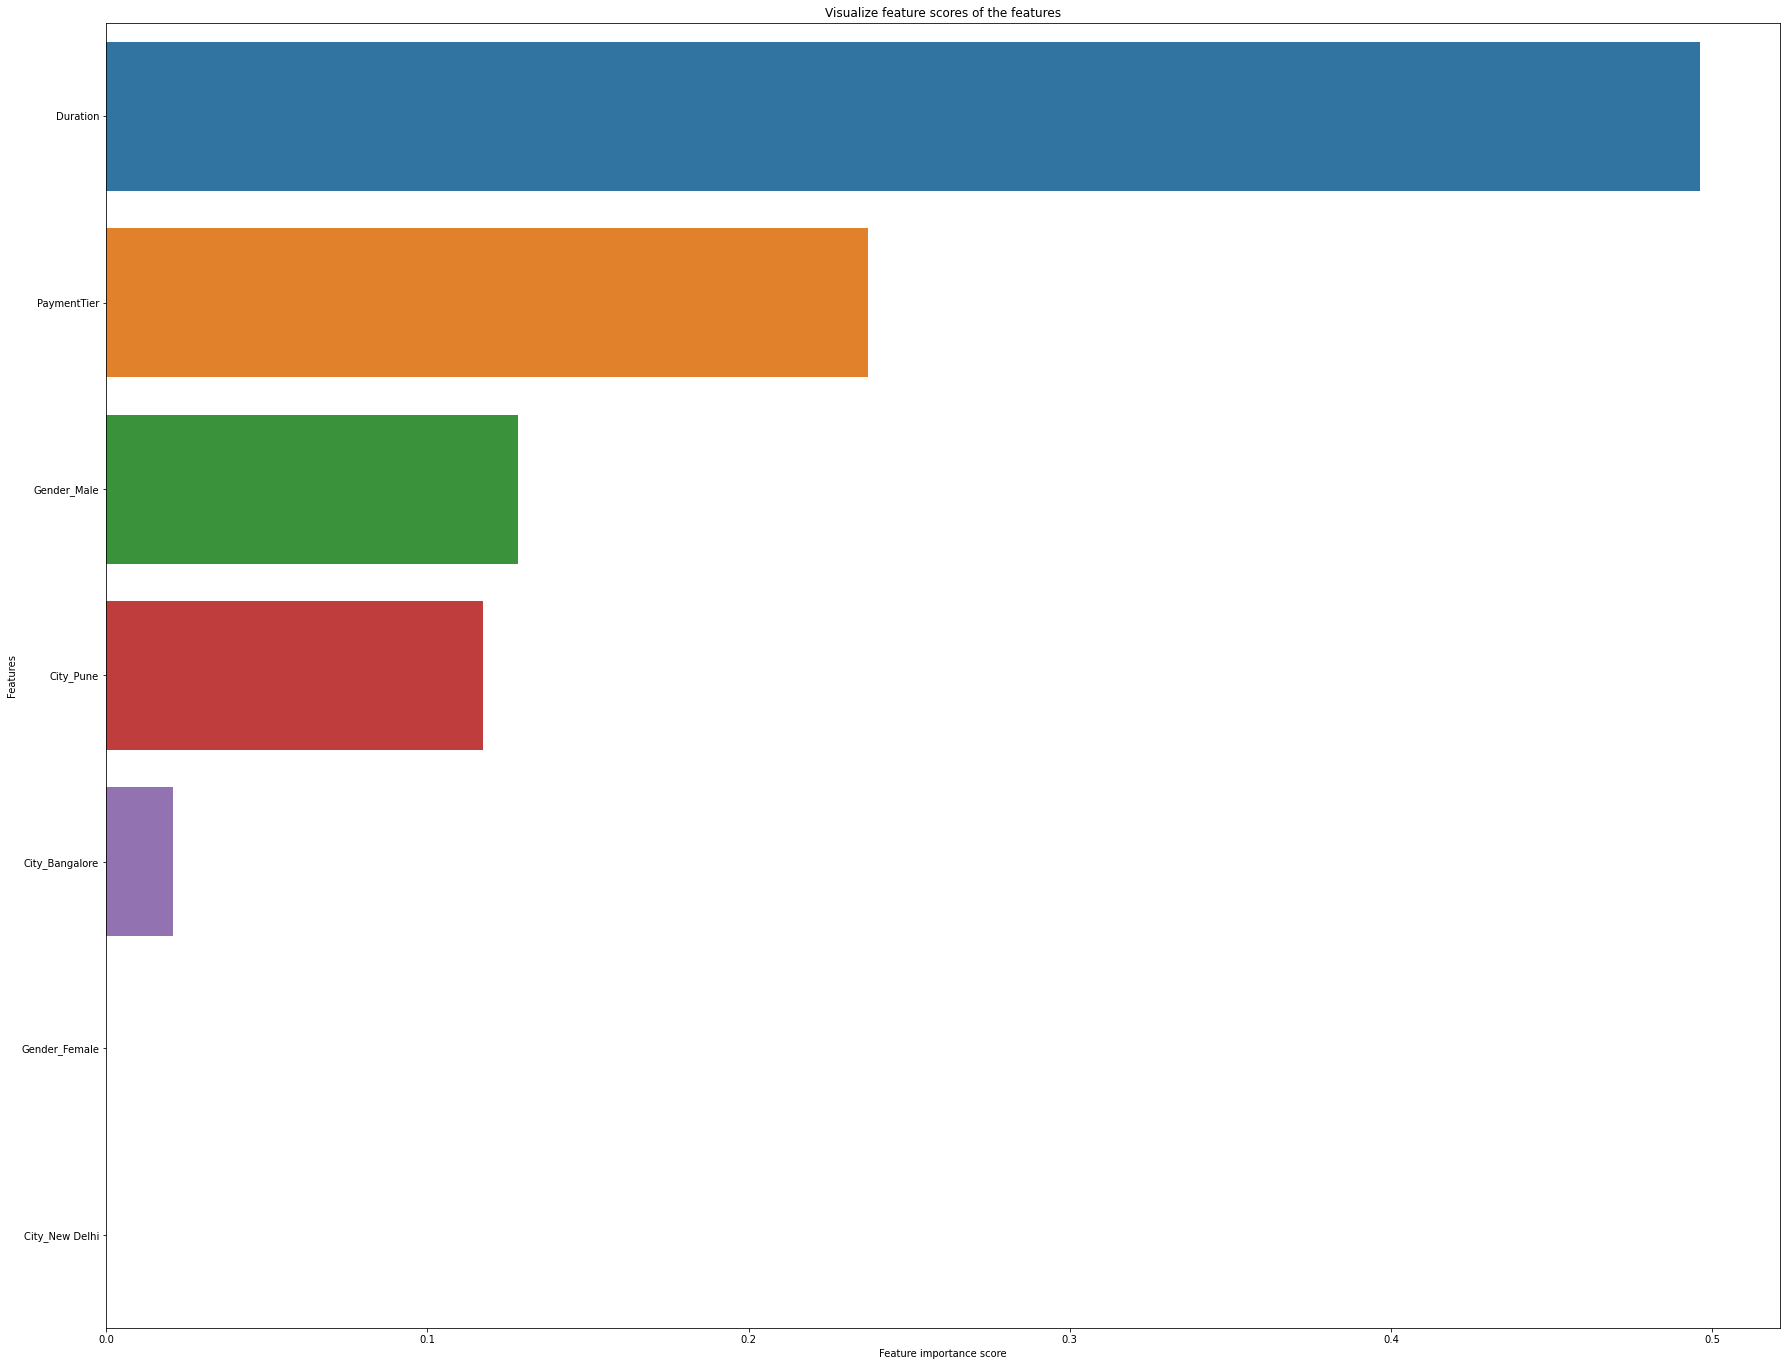

In [401]:
# Creating a seaborn bar plot
f, ax = plt.subplots(figsize=(30, 24))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data = x[[]])
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()